## Модели искусственного интеллекта для бизнеса. Лекция 3

In [1]:
# импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Нормирование данных

In [41]:
h = np.array([1.55,1.78,1.92])
w = np.array([53, 75, 100])

d01 = np.sqrt((h[0] - h[1])**2 + (w[0] - w[1])**2)
d02 = np.sqrt((h[0] - h[2])**2 + (w[0] - w[2])**2)
d12 = np.sqrt((h[1] - h[2])**2 + (w[1] - w[2])**2)

print(d01, d02, d12)

22.00120223987771 47.00145636041505 25.00039199692677


In [40]:
h1 = (h - h.mean()) / h.std()
w1 = (w - w.mean()) / w.std()

d01 = np.sqrt((h1[0] - h1[1])**2 + (w1[0] - w1[1])**2)
d02 = np.sqrt((h1[0] - h1[2])**2 + (w1[0] - w1[2])**2)
d12 = np.sqrt((h1[1] - h1[2])**2 + (w1[1] - w1[2])**2)

print(d01, d02, d12)

1.8937998912651461 3.4461306885461744 1.5930176550510646


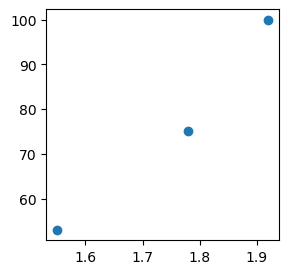

In [43]:
plt.figure(figsize = (3,3));
plt.scatter(h,w);

#### Работа с выбросами

In [97]:
# Simple regression
np.random.seed(123) 

mu = 0.0
sigma = 1.0
size = 20
noise = 0.25 * np.random.normal(loc = 0.0, scale = 1.0, size = (size,1))

X = np.random.normal(loc = mu, scale = sigma, size = (size,1))
Y = 3 + 0.5 * X + noise

Y_out = Y.copy()        # same data with outlier
Y_out[-2,0] = 5.5 + 0.5 * X[-2,0] + noise[-1,0]
Y_out[-1,0] = 5.5 + 0.5 * X[-1,0] + noise[-1,0]

In [98]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)
y_pred = lr.predict(X)

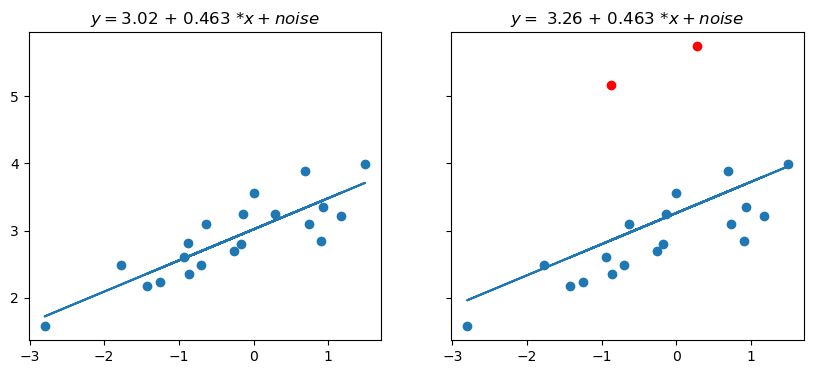

In [99]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4), sharey = True)
ax[0].scatter(X, Y);
ax[0].plot(X, y_pred);
ax[0].set_title(f'$y = ${lr.intercept_[0] :.2f} + {lr.coef_[0][0] :.3f} $* x + noise$');

lr.fit(X, Y_out)
y_pred_out = lr.predict(X)

ax[1].scatter(X[:-2], Y_out[:-2]);
ax[1].scatter(X[-1,0], Y_out[-1,0], c = 'r');
ax[1].scatter(X[-2,0], Y_out[-2,0], c = 'r');
ax[1].plot(X, y_pred_out);
ax[1].set_title(f'$y =$ {lr.intercept_[0] :.2f} + {lr.coef_[0][0] :.3f} $* x + noise$');

In [100]:
# Calfirnia housiing dataset
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(download_if_missing = True, return_X_y = True, as_frame = True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [150]:
# масштабируем в диапазон [0,1], чтобы все признаки были в одном масштабе

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler() 
X_trans = pd.DataFrame(scaler.fit_transform(X), columns = X.columns) 

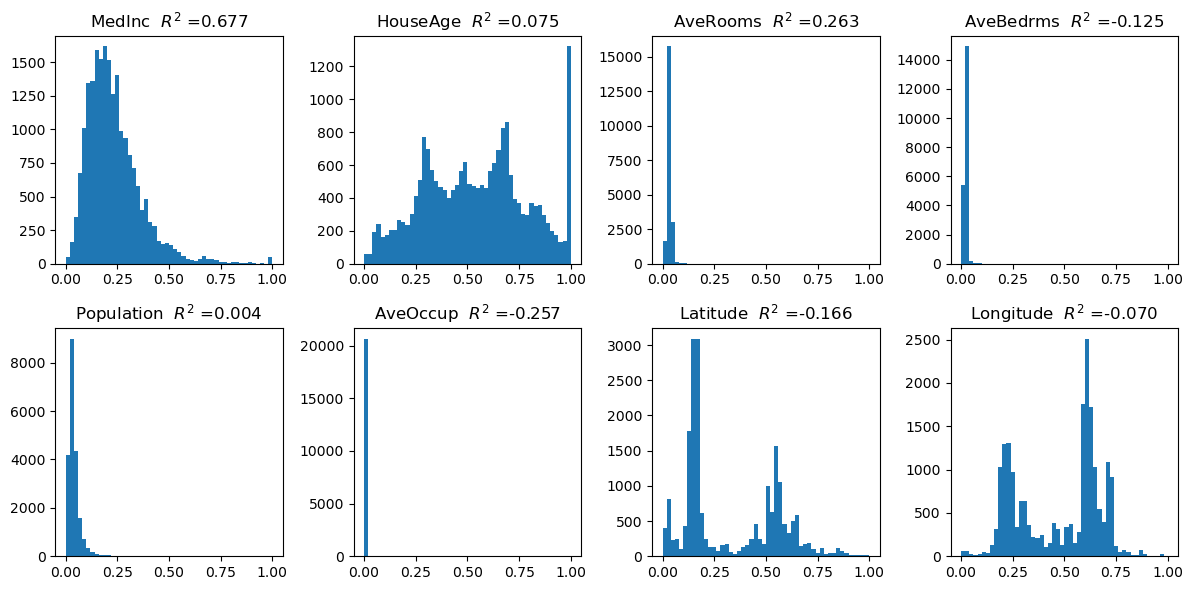

In [111]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (12,6))
axes = axes.flatten()

r_squad = pd.concat([X_trans, y], axis = 1).corr(method = 'spearman')['MedHouseVal']

for c, ax  in zip(X.columns, axes):
    ax.hist(X_trans[c], bins = 50);
    ax.set_title(c + f'  $R^2$ ={r_squad[c] :.3f}');
fig.tight_layout()    

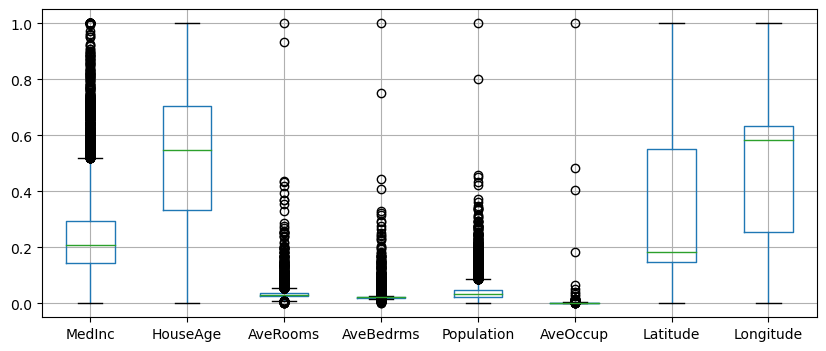

In [112]:
boxplot = X_trans.boxplot(figsize = (10,4))

In [131]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    outliers = outliers.isna()
    return outliers

In [140]:
outliers = find_outliers_IQR(X)
X_clean = X[~outliers].dropna()
X_clean.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25


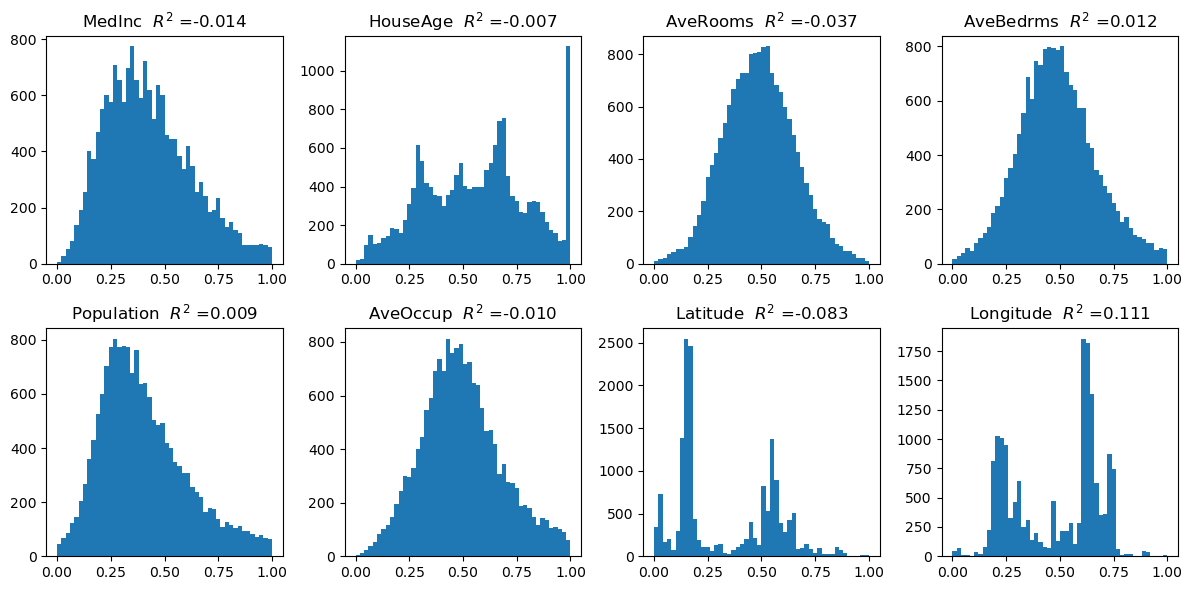

In [141]:
X_trans = pd.DataFrame(scaler.fit_transform(X_clean), columns = X.columns) 

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (12,6))
axes = axes.flatten()

r_squad = pd.concat([X_trans, y], axis = 1).corr(method = 'spearman')['MedHouseVal']

for c, ax  in zip(X.columns, axes):
    ax.hist(X_trans[c], bins = 50);
    ax.set_title(c + f'  $R^2$ ={r_squad[c] :.3f}');
fig.tight_layout()  

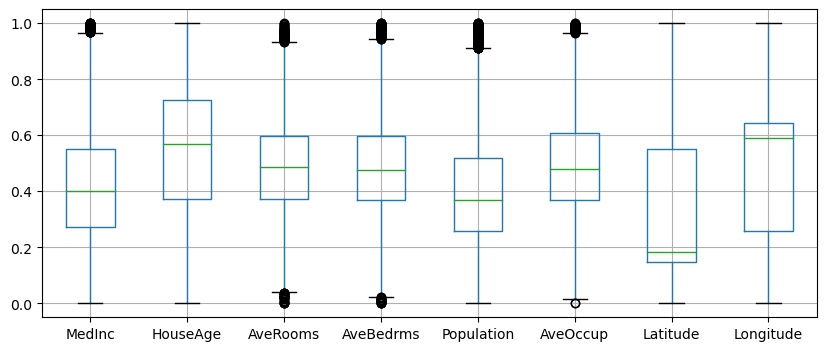

In [142]:
boxplot = X_trans.boxplot(figsize = (10,4))

In [143]:
# Кросс-валидация моделй

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Модели регрессии

mr = {'DT' : DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = 8, random_state = 1),
      'RF' : RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, max_features=1.0,random_state = 1),
      'GB' : GradientBoostingRegressor( learning_rate = 0.1, n_estimators = 100, criterion = 'friedman_mse', max_depth = 5, random_state = 1)
     }

In [146]:
# Selecting y samples that correspon X_clean
y_clean = y.loc[X_clean.index]
print(X_clean.shape, X_trans.shape, y_clean.shape)

(16842, 8) (16842, 8) (16842,)


In [148]:
# Validate on clean data
for m in mr:
    res = cross_val_score(mr[m], X_clean, y_clean, scoring = 'neg_mean_squared_error', cv = 5)
    print(f'{m :2s}: {-res.mean() :.3f} ({res.std() :.3f})')

DT: 0.596 (0.081)
RF: 0.416 (0.053)
GB: 0.405 (0.034)


In [151]:
# Train models on full data

for m in mr:
    mr[m].fit(X_clean, y_clean)

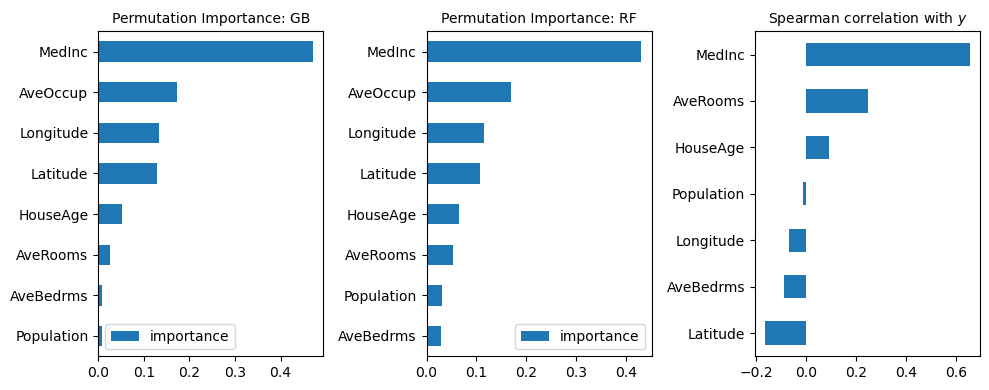

In [203]:
# Признаки GradientBoosting и RandomForest

fig, ax = plt.subplots(1,3,figsize = (10,4))

feat_gb = pd.DataFrame({'feature' : mr['GB'].feature_names_in_, 
                        'importance' : mr['GB'].feature_importances_}).sort_values(by = 'importance', ascending = True).set_index('feature')
feat_rf = pd.DataFrame({'feature' : mr['RF'].feature_names_in_, 
                        'importance' : mr['RF'].feature_importances_}).sort_values(by = 'importance', ascending = True).set_index('feature')

feat_gb.plot.barh(ax = ax[0]);
ax[0].set_title('Permutation Importance: GB', fontsize = 10);
ax[0].set_ylabel('');
feat_rf.plot.barh(ax = ax[1]);
ax[1].set_title('Permutation Importance: RF', fontsize = 10);
ax[1].set_ylabel('');

pd.concat([X_clean, y_clean], axis = 1).corr(method = 'spearman')['MedHouseVal'].sort_values(ascending = True).iloc[1:-1].plot.barh(ax = ax[2]);
ax[2].set_title('Spearman correlation with $y$', fontsize = 10);

fig.tight_layout();

#### Feature Generation

In [236]:
# Главные компоненты
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
X_pca = pca.fit_transform(X_clean)

evr = pca.explained_variance_ratio_
print('Explained variance ratio: ', evr)

Explained variance ratio:  [9.99614702e-01 3.54720315e-04 2.08529717e-05 7.08682810e-06
 1.36195787e-06 8.34061464e-07]


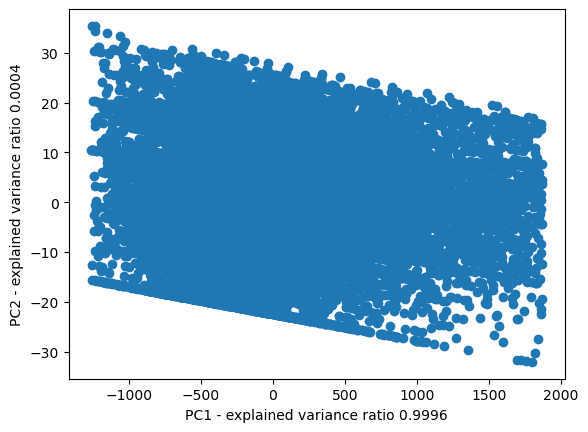

In [239]:
plt.scatter(X_pca[:,0], X_pca[:,1]);
plt.xlabel(f'PC1 - explained variance ratio {evr[0] :.4f}');
plt.ylabel(f'PC2 - explained variance ratio {evr[1] :.4f}');

In [235]:
# Validate on generated data data
for m in mr:
    res = cross_val_score(mr[m], X_pca, y_clean, scoring = 'neg_mean_squared_error', cv = 5)
    print(f'{m :2s}: {-res.mean() :.3f} ({res.std() :.3f})')

DT: 0.526 (0.052)
RF: 0.448 (0.038)
GB: 0.434 (0.044)


In [208]:
# Полиномиальные признаки
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X_poly = pd.DataFrame(poly.fit_transform(X_clean))
print(X_clean.shape, X_poly.shape)

(16842, 8) (16842, 45)


In [210]:
# Validate on generated data data
for m in mr:
    res = cross_val_score(mr[m], X_poly, y_clean, scoring = 'neg_mean_squared_error', cv = 5)
    print(f'{m :2s}: {-res.mean() :.3f} ({res.std() :.3f})')

DT: 0.599 (0.085)
RF: 0.403 (0.048)
GB: 0.419 (0.093)
